<a href="https://colab.research.google.com/github/macorony/Machine_Learning_Basics/blob/main/Supervised_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3c99f807a27f271b816dd7375b6db2fd594b4b237010767e263b7d3dc62712f7
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Sample Datasets

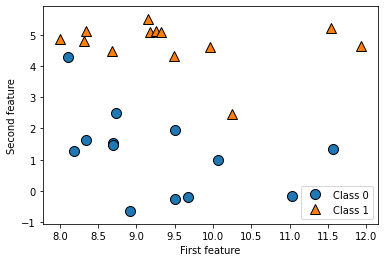

In [3]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



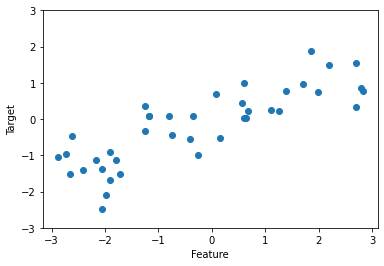

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys: {cancer.keys()}")
print(f"Shape of cancer data: {cancer.data.shape}")
print(f"{[n for n in zip(cancer.target_names, np.bincount(cancer.target))]}")
print(f"Feature names: \n{cancer.feature_names}")

cancer.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
[('malignant', 212), ('benign', 357)]
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f"Data shape: {boston.data.shape}")

Data shape: (506, 13)


# K-Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [8]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm = 'auto', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [9]:
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

In [10]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [11]:
z.shape

(307, 197)

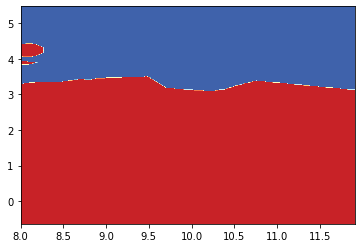

In [12]:
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)

In [13]:
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
step=0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

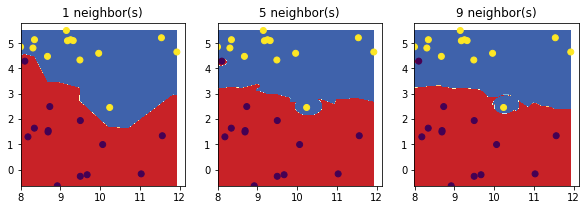

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for neighbor, ax in zip([1,5,9], axes.ravel()):
  knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance', n_jobs=-1).fit(X, y)
  zz = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu)
  ax.scatter(X[:,0], X[:,1], c=y)
  ax.set_title('{} neighbor(s)'.format(neighbor))


In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [17]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,20)

In [18]:
neighbors

range(1, 20)

In [19]:
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance', n_jobs=-1).fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

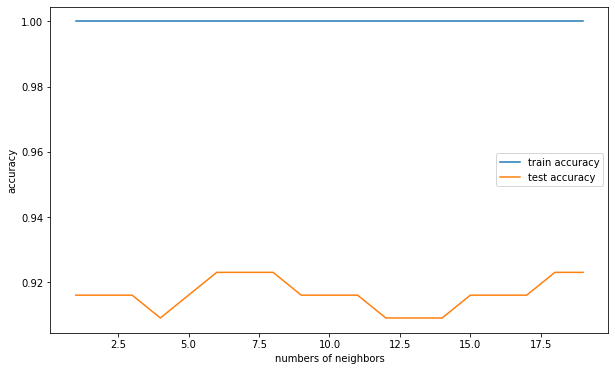

In [20]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_accuracy, label='train accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('numbers of neighbors')
plt.legend()
plt.show()

## K-neighbors regression
The prediction using a single neighbor is just the target value of the nearest neighbor. If more than one neighbor, the prediction is average, or mean, of the relevant neighbors

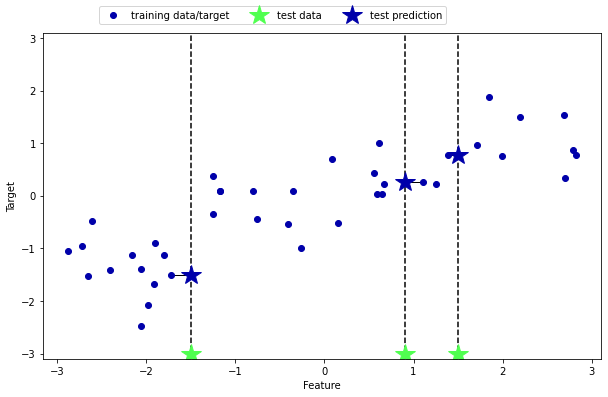

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

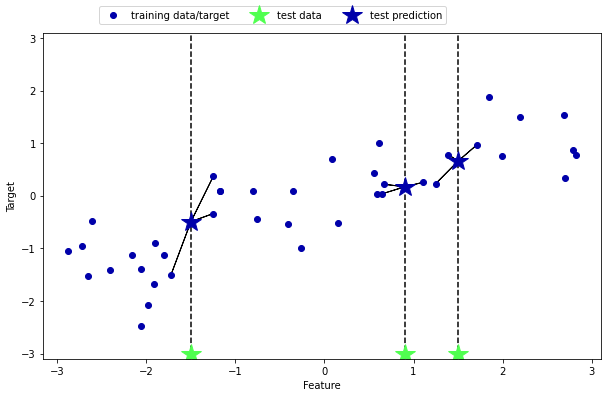

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
reg.score(X_test, y_test)

0.8344172446249605

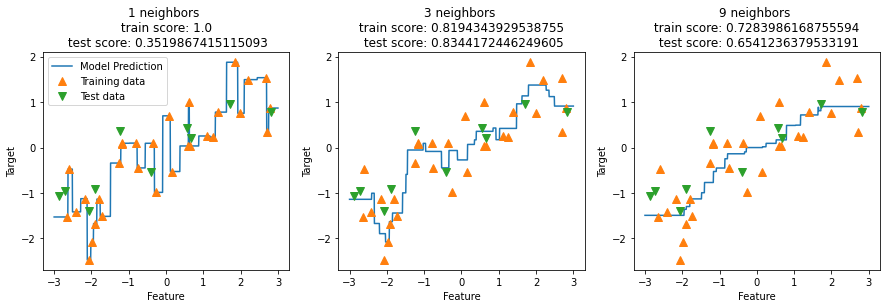

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', markersize=8)
  ax.plot(X_test, y_test, 'v', markersize=8)
  ax.set_title(f"{n_neighbors} neighbors \n train score: {reg.score(X_train, y_train)} \n test score: {reg.score(X_test, y_test)}")
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(['Model Prediction', 'Training data', 'Test data'], loc='best')



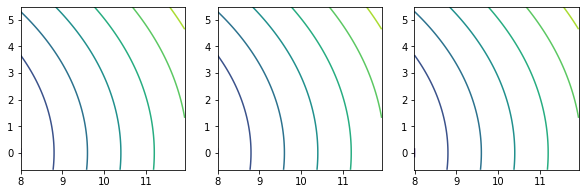

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for neighbor, ax in zip([1,5,9], axes):
  zz = np.sqrt(xx**2 + yy**2)
  ax.contour(xx, yy, zz)


# Linear Regression

## The normal equation
a closed-form solution to find the value of theta minimizing the cost function


In [27]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [28]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [29]:
theta_best

array([[3.70301142],
       [3.02715499]])

Building model using Scikit-Learn. 
This function computes θ = X+ y, where X+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse).





In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()
reg.fit(X,y)
reg.intercept_, reg.coef_

(array([3.70301142]), array([[3.02715499]]))

## Gradient Descent
gradient descent (also called steepest descent) is an iterative optimization to find local or global minimum. Some key factors in gradient descent.
1. random initiation
2. learning rate
3. complexity of cost funciton, but MSE cost function is convex function
4. the cost function has bowl shape but can be elongated if the features have different scales.  

### Batch Gradient Descent

In [32]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100 # number of data
theta = np.random.randn(2,1)

In [33]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

### Stochastic Gradient Descent
1. Stochastic gradient descent just pick a random instance in the training set a every step and computes the gradients base on that single instance. 
2. When the cost functio is very irregular, this can actually help the algorithm jump out of local minima.



In [34]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [35]:
theta

array([[3.67739278],
       [3.04963221]])

In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, penalty=None)

In [37]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([3.65892443]), array([3.02148807]))

### Mini-batch Gradient Descent

### Polynomial Regression

In [38]:
# generate nonlinear data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

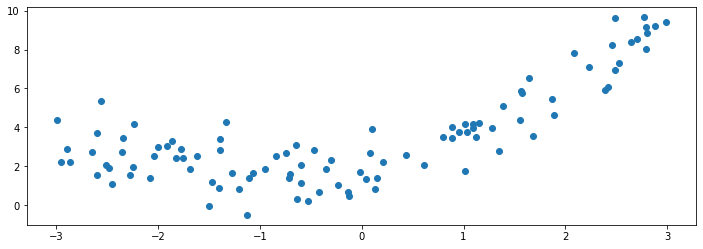

In [39]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(X, y)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04543809]), array([[0.98242142, 0.51219314]]))

In [42]:
y_predict = lin_reg.predict(X_poly)

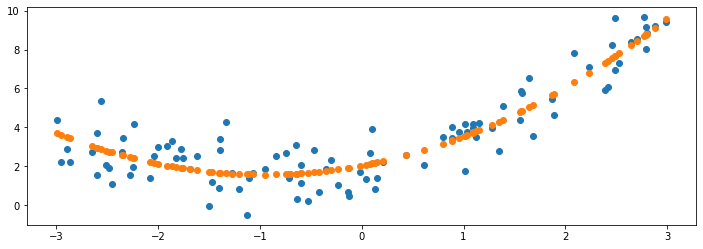

In [43]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(X, y)
plt.scatter(X, y_predict)

### Learning Curve

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [45]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), linewidth=3, label='train')
  plt.plot(np.sqrt(val_errors), linewidth=3, label='validation')
  plt.legend()




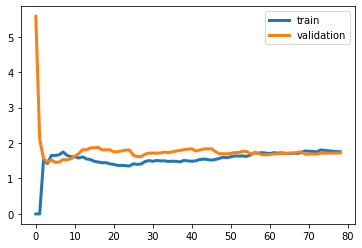

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 5.0)

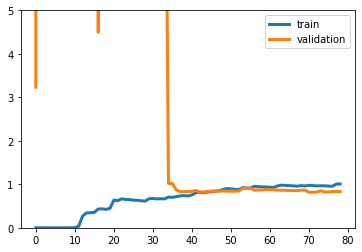

In [47]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)), ('lin_reg', LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 5)

## Logistic Regression

In [48]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [49]:
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [50]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

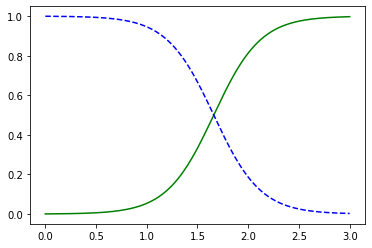

In [51]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], 'g-', label='Iris-Virginica') 
plt.plot(X_new, y_prob[:,0], 'b--', label='Non Iris')
plt.show()

### Softmax Regression
The logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. 

the softmax regression computes a score for each class, then estimates the probability of each class. 

The softmax classifier predicts only one class at a time

The cost function is the cross entropy.

In [52]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [53]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

# Decision Tree

## Start with an example
Decision Trees require very little data preparation. In particular, They don't require feature scaling and centering at all.

In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [55]:
from matplotlib import image
export_graphviz(tree_clf, out_file='iris_tree.dot', 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, 
                rounded=True, 
                filled=True)

Decision Trees are often called white box models while Random Forest or neural networks are generally considered as black box models.

## The CART Training Algorithm
Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. The model first split the training set in two subsets using a single feature *k* and a threshold *t*. Once it has successfully split the training set in two, it splits the subsets using the same logic

The CART algorithm is a greedy algorithm.

A greedy algorithm often producess a reasonalbly good solution, but it is not guaranteed to be the optimal solution.


## Gini Impurity or Entropy
By default, the Gini impurity measure is used, but entropy impurity can be the alternative. In most cases, the two options do not make differences.

## Regularization Hyperparameters
1. Decision Trees make very few assumption about the training data. if no constrain, the tree will adapt itself to the training data, very likely overfitting. 
2. It does have some parameters but the number of the parameters is not determined prior to training. 
3. The most regularized hyperparameters is the maximum depth of the Decision Tree.

## Regression
1. Decision Trees are capable of performing regression task.
2. The Decisio Trees predicts a value by averaging target value of the training instances of the leaf node. 
3. Instead of impurity, it tries minimize the MSE.
4. Decison Trees like orthogonal decision boundaries, which makes them sensitive to training set rotation. Using PCA often results in a better orientation of the training data.


# Ensemble Learning
1. A group of predictors is called an ensemble. The technique to train a model by an ensemble is called ensemble learning.
2. Ensemble methods work best when the predictors are as independent fro one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increase the chance that they will make very different types of errors, improving the emsembles' accuracy.



## Voting Classifiers
1. A simple way to create an better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This mojority-vote classifier is called a hard voting classifier.
2. The voting classifier is always better than the best classifier in the ensemble. Even if each classifier is a weak learner, the ensemble can still be a strong learner. 
3. If all classifier are able to estimate class probabilities, then it can predict the class with the highest class probability averaging over all the individual classifiers. This is called soft voting.
3. The soft voting have better performance than hard voting. 



In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [58]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [72]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 1.0
RandomForestClassifier 0.9555555555555556
SVC 0.9777777777777777
VotingClassifier 1.0


## Bagging and Pasting
1. The same training algorithm for every predictor, but train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (bootstrap aggregating). When sampling is performed without replacement, it is called pasting.
2. Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode for the classification, or the average for regression.
3. Each predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)